<a href="https://colab.research.google.com/github/namespaiva/pred-analysis/blob/main/prova1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova 1

## 1

In [61]:
!pip install ucimlrepo

In [62]:
import ucimlrepo
import pandas as pd
import seaborn as sns
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pytensor.tensor as tt
from sklearn.model_selection import train_test_split as tts

dados = ucimlrepo.fetch_ucirepo(id=17)

X = dados.data.features
y = dados.data.targets

X_f = X.copy()

scaler = StandardScaler()
X_f = scaler.fit_transform(X)
X_f = pd.DataFrame(X_f, columns=X.columns)

y['Diagnosis'].replace('M', 0, inplace=True)
y['Diagnosis'].replace('B', 1, inplace=True)

y_f = y.copy()

X_train, X_test, y_train, y_test = tts(X_f, y_f, test_size=0.3)

<ipython-input-62-1c530e1ed4dc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'].replace('M', 0, inplace=True)
<ipython-input-62-1c530e1ed4dc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'].replace('B', 1, inplace=True)


<Axes: >

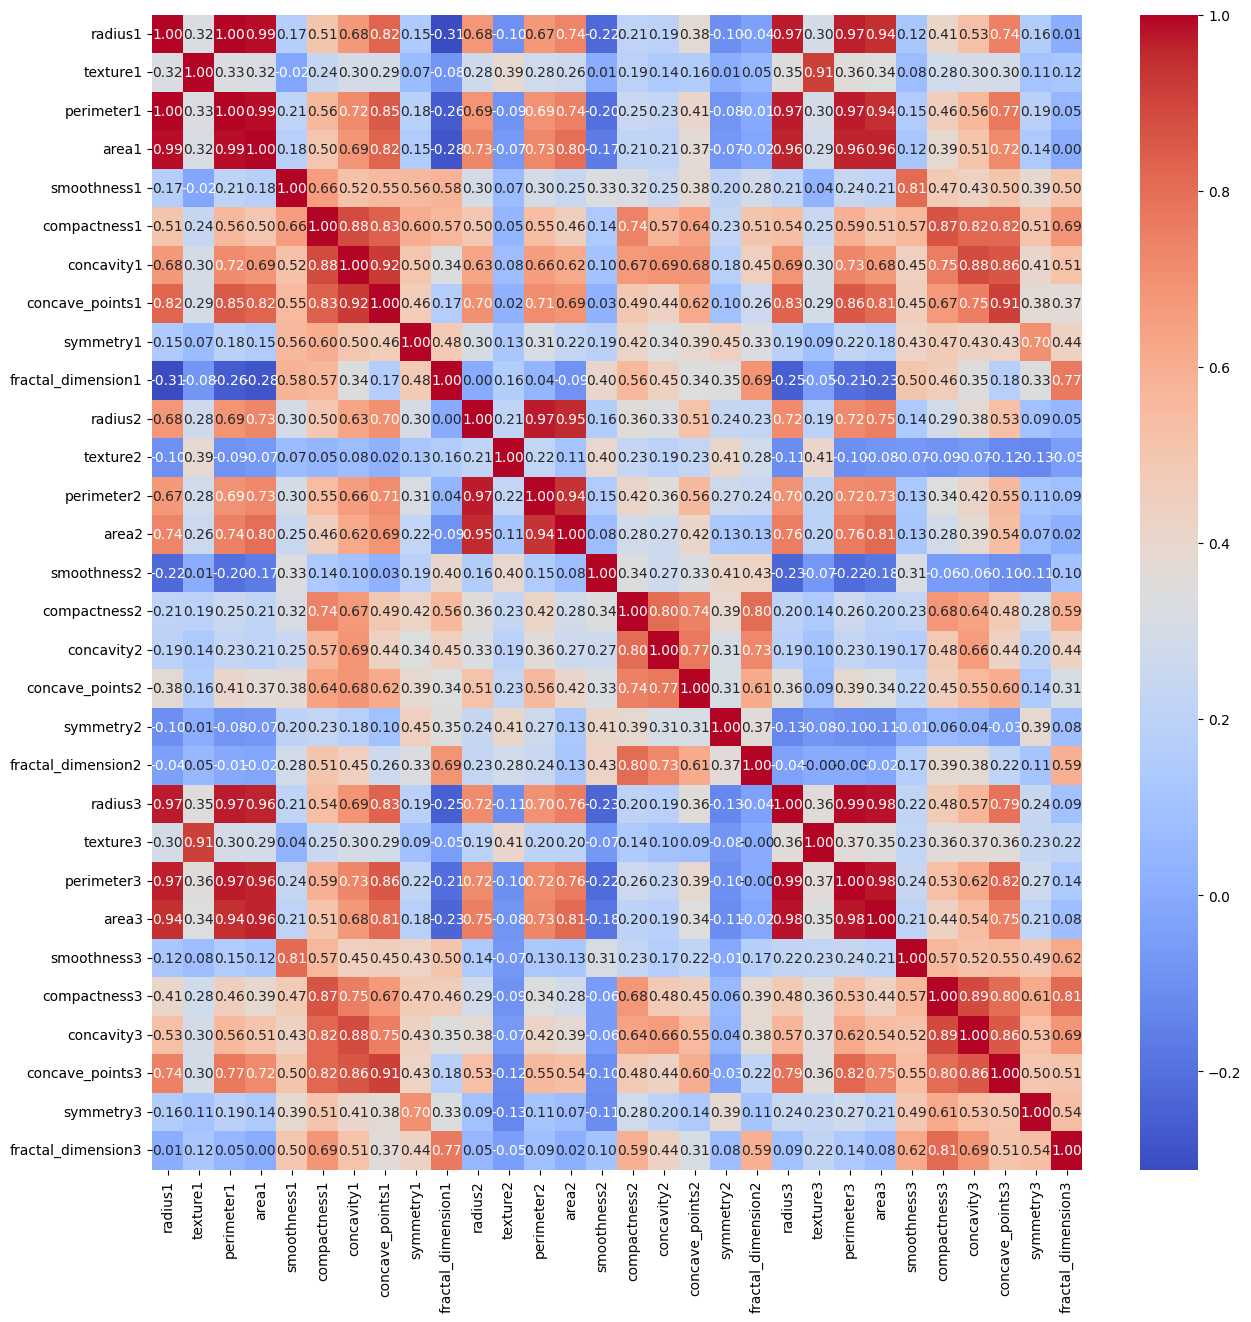

In [63]:
# Muuuitas colunas, algumas com correlação alta
plt.figure(figsize=(15,15))
sns.heatmap(X_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

In [64]:
coords = {'features': X_train.columns}

with pm.Model(coords=coords) as model_logit:
  alpha = pm.Normal('alpha', 0, 1)
  betas = pm.Normal('betas', 0, 1, dims='features')

  X = [
    pm.Data("X_"+column,X_train[column].values)
    for column in X_train.columns
    ]

  y = pm.Data("y",y_train.values.flatten())

  mu = alpha + tt.dot(betas, X)
  likelihood = pm.Bernoulli('Y_obs',pm.math.invlogit(mu),observed=y)

In [66]:
with model_logit:
  trace_prior = pm.sample_prior_predictive()

Text(0, 0.5, 'Contagem')

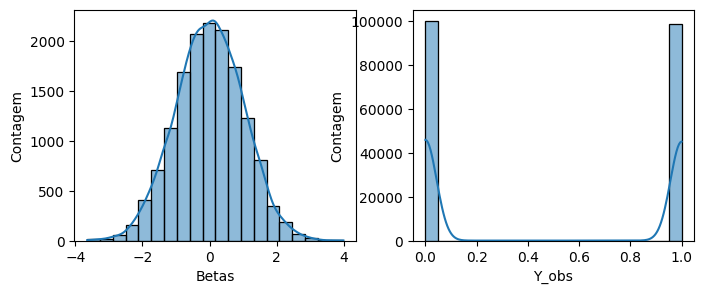

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(trace_prior.prior['betas'].values.flatten(), bins=20, kde=True, ax=axes[0]) # Access the first subplot
axes[0].set_xlabel("Betas")
axes[0].set_ylabel("Contagem")
sns.histplot(trace_prior.prior_predictive['Y_obs'].values.flatten(), bins=20, kde=True, ax=axes[1]) # Access the second subplot
axes[1].set_xlabel("Y_obs")
axes[1].set_ylabel("Contagem")

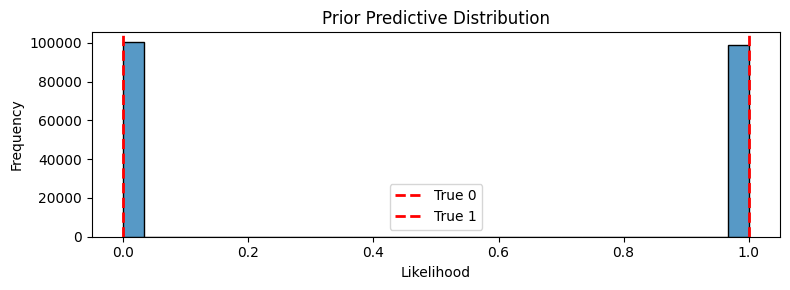

In [68]:
fig, ax = plt.subplots(figsize=(8, 3))


prior_samples = trace_prior['prior_predictive']['Y_obs']

prior_samples_flat = prior_samples.values.flatten()

unique_values = np.unique(y_train)

sns.histplot(data=prior_samples_flat, bins=30, kde=False, ax=ax)

for value in unique_values:
    ax.axvline(value, color='r', linestyle='--', linewidth=2, label=f'True {value}')

ax.set_title("Prior Predictive Distribution")
ax.set_xlabel("Likelihood")
ax.set_ylabel("Frequency")

ax.legend()

plt.tight_layout()
plt.show()

Para um desafio de categorização binário, o "intervalo" de incerteza é 1 ou 0... não são os histogramas mais emocionantes.

In [69]:
with model_logit:
  trace = pm.sample()

Output()

Output()

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

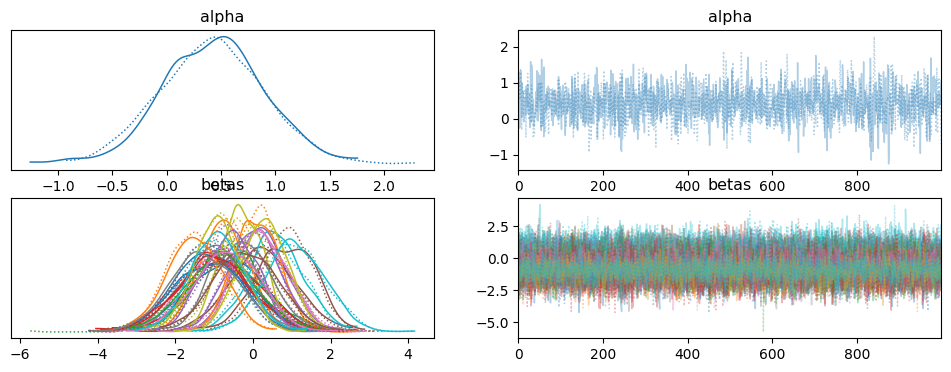

In [70]:
az.plot_trace(trace)

In [71]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.423,0.470,-0.485,1.277,0.011,0.009,1998.0,1177.0,1.00
betas[radius1],-0.678,0.929,-2.387,1.049,0.020,0.019,2145.0,1546.0,1.00
betas[texture1],-0.739,0.618,-1.921,0.372,0.015,0.012,1608.0,1266.0,1.00
betas[perimeter1],-0.627,0.917,-2.334,1.146,0.018,0.019,2626.0,1278.0,1.00
betas[area1],-0.677,0.945,-2.396,1.117,0.018,0.021,2823.0,1300.0,1.00
betas[smoothness1],0.208,0.671,-0.985,1.492,0.016,0.014,1818.0,1540.0,1.00
betas[compactness1],0.242,0.832,-1.369,1.764,0.018,0.017,2098.0,1579.0,1.00
betas[concavity1],-0.900,0.853,-2.555,0.626,0.019,0.015,1992.0,1507.0,1.00
betas[concave_points1],-1.046,0.828,-2.537,0.585,0.019,0.015,1938.0,1281.0,1.00
betas[symmetry1],-0.277,0.560,-1.290,0.742,0.013,0.011,1764.0,1637.0,1.00


O modelo convergiu razoavelmente bem, de acordo com os valores de r_hat

In [72]:
vars = {"X_"+column : X_test[column].values for column in X_test.columns}
vars["y"] = y_test.values.flatten()

with model_logit:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

Output()

In [73]:
from sklearn.metrics import f1_score

mean_likelihood = trace_post.posterior_predictive.Y_obs.mean(dim=['chain', 'draw'])
binary_predictions = (mean_likelihood > 0.5).astype(int).values[:len(y_test.values.flatten())]

abs_diff = np.abs(y_test.values.flatten() - binary_predictions)
accuracy = 1 - np.mean(abs_diff)

df = pd.DataFrame({'y_test': y_test.values.flatten(), 'binary_predictions': binary_predictions})
df['abs_diff'] = abs_diff
df['accuracy'] = accuracy

errors = df["abs_diff"].sum()
acc = (len(df)-errors)/len(df)

f1 = f1_score(y_test.values.flatten(), binary_predictions)

print(f"F1 Score: {f1}")
print(f"Acuracia: {acc:.4f}")
print(f"Erros: {errors}")

F1 Score: 0.9606986899563319
Acuracia: 0.9474
Erros: 9


Um F1 score de 98% mostra que o modelo foi de boa qualidade. Com uma acurácia de 97% e apenas 4 erros, é possível concluir que o modelo de regressão logística foi adequado para a tarefa em questão.


## 2

In [74]:
!pip install ucimlrepo

In [75]:
import ucimlrepo
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import pandas as pd
import seaborn as sns
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pytensor.tensor as tt

dados = ucimlrepo.fetch_ucirepo(id=9)

X = dados.data.features
y = dados.data.targets

# Sim, essa é uma maneira extremamente idiota de remover os NaNs, mas eu não tava conseguindo remover eles de jeito nenhum
# e já tava começando a ficar maluco.

X.drop([32,126,330,336,354,374], axis=0, inplace=True)
y.drop([32,126,330,336,354,374], axis=0, inplace=True)

<ipython-input-75-8fab9ddf02c2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop([32,126,330,336,354,374], axis=0, inplace=True)
<ipython-input-75-8fab9ddf02c2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop([32,126,330,336,354,374], axis=0, inplace=True)


<Axes: >

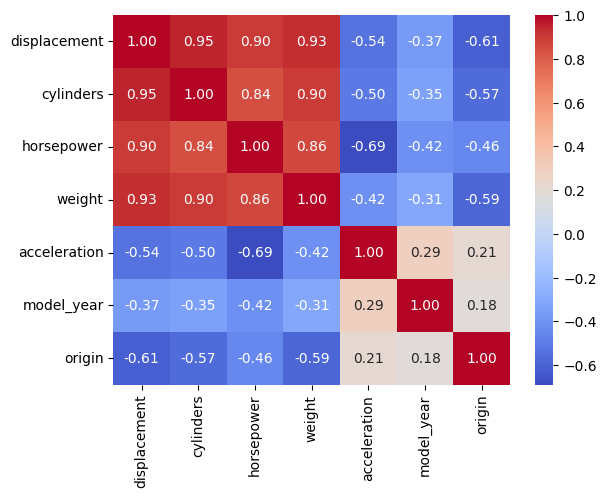

In [76]:
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

"Os dados se referem ao consumo de combustível em ciclo urbano em milhas por galão, que deve ser previsto em termos de 3 atributos discretos multivalorados e 5 atributos contínuos"
(fonte: site da UCI)

Visto o objetivo e o meu conhecimento limitado de carros, vou usar as colunas weight, model_year e horsepower para gerar os clusters. Minha hipótese é que carros mais antigos são menos eficientes, e o peso e a potência dos carros também podem interferir na eficiência deles.

<Axes: ylabel='mpg'>

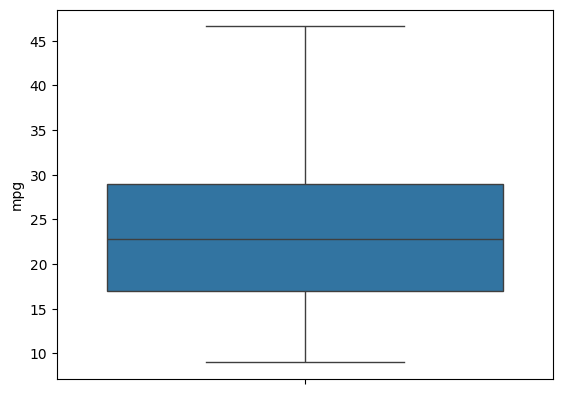

In [77]:
sns.boxplot(y['mpg'])

Escolhi usar quatro clusters baseado no Olhômetro(TM) depois de olhar o boxplot dos targets.

In [78]:
features = X[['horsepower','weight','model_year']]

n_clusters = 4

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

X['cluster'] = clusters
X

<ipython-input-78-01cc2811a69b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = clusters


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,cluster
0,307.0,8,130.0,3504,12.0,70,1,2
1,350.0,8,165.0,3693,11.5,70,1,2
2,318.0,8,150.0,3436,11.0,70,1,2
3,304.0,8,150.0,3433,12.0,70,1,2
4,302.0,8,140.0,3449,10.5,70,1,2
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,3
394,97.0,4,52.0,2130,24.6,82,2,3
395,135.0,4,84.0,2295,11.6,82,1,3
396,120.0,4,79.0,2625,18.6,82,1,3


In [79]:
scaler = StandardScaler()
X_f = scaler.fit_transform(X)
X_f = pd.DataFrame(X_f, columns=X.columns)
y_f = y.copy()

coords = {'features': X_f.columns}

In [80]:
def analise_priori(trace):
  fig, axes = plt.subplots(3, 2, figsize=(10,10), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})

  sns.histplot(trace.prior['betas'].values.flatten(), bins=20, kde=True, ax=axes[0][0], )
  axes[0][0].set_xlabel("Betas")
  axes[0][0].set_ylabel("Contagem")
  sns.histplot(trace.prior_predictive['Y_obs'].values.flatten(), bins=20, kde=True, ax=axes[0][1])
  axes[0][1].set_xlabel("Y_obs")
  axes[0][1].set_ylabel("Contagem")

  prior_samples = trace['prior_predictive']['Y_obs']

  # As samples precisam ter o mesmo shape
  prior_samples_reshaped = prior_samples.values.reshape(len(y), -1)

  mean_pred = np.mean(prior_samples_reshaped, axis=1)
  std_pred = np.std(prior_samples_reshaped, axis=1)

  sns.lineplot(data={'x': range(len(y)), 'y': mean_pred}, palette='viridis', ax=axes[1][0])
  sns.kdeplot(data={'x': range(len(y)), 'y': mean_pred}, fill=True, alpha=0.3, ax=axes[1][0])

  for i in range(len(y)):
      axes[1][0].fill_between(range(len(y)), mean_pred[i] - std_pred[i], mean_pred[i] + std_pred[i], alpha=0.2)

  axes[1][0].set_title("Predict a Priori")
  axes[1][0].set_xlabel("Observado")
  axes[1][0].set_ylabel("Predicted")

  axes[1][0].legend(['Predicted'])

  az.plot_ppc(ridge_trace_prior, group='prior', kind='cumulative',ax=axes[2][0], observed=True);
  az.plot_ppc(ridge_trace_prior, group='prior',ax=axes[2][1], observed=True);

  return fig, axes

def analise_posteriori(trace):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  az.plot_ppc(trace, group='posterior', kind='cumulative', ax=axes[0]);
  az.plot_ppc(trace, group='posterior',ax=axes[1]);

  return fig, axes

In [81]:
with pm.Model(coords=coords) as model_ridge:
  alpha = pm.Normal('alpha', 0, 1)
  betas = pm.Normal('betas', 0, 1, dims='features')
  epsilon = pm.HalfNormal('eps', 1)

  mu = alpha + tt.dot(X_f, betas)

  likelihood = pm.Normal('Y_obs', mu, epsilon, observed=y_f.values.flatten())

with model_ridge:
  ridge_trace_prior = pm.sample_prior_predictive()
  trace_ridge = pm.sample()

Output()

Output()

(<Figure size 1000x1000 with 6 Axes>,
 array([[<Axes: xlabel='Betas', ylabel='Contagem'>,
         <Axes: xlabel='Y_obs', ylabel='Contagem'>],
        [<Axes: title={'center': 'Predict a Priori'}, xlabel='Observado', ylabel='Predicted'>,
         <Axes: >],
        [<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>]], dtype=object))

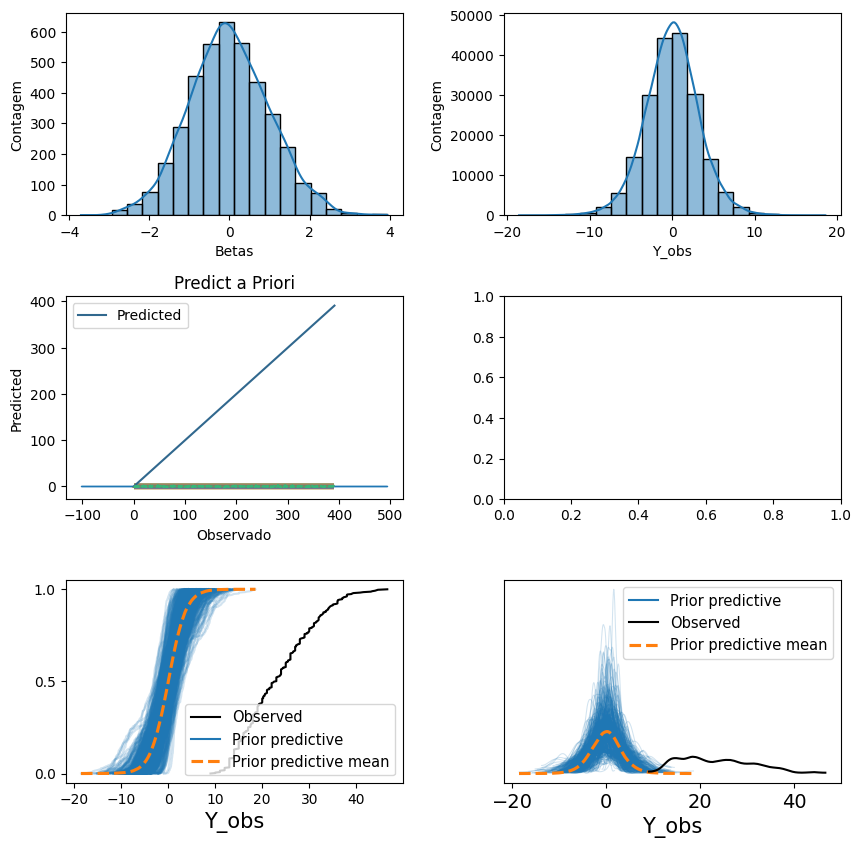

In [82]:
analise_priori(ridge_trace_prior)

Uma priori ruim, bem ruim. A similaridade dos histogramas não importa muito, visto que os dados estão normalizados. O alinhamento dos gráficos ppc foi péssimo.

In [83]:
pm.summary(trace_ridge)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,22.891,0.161,22.583,23.179,0.003,0.002,2513.0,1445.0,1.0
betas[displacement],0.225,0.555,-0.807,1.290,0.013,0.011,1880.0,1506.0,1.0
betas[cylinders],-0.226,0.417,-1.011,0.562,0.009,0.009,2374.0,1554.0,1.0
betas[horsepower],-1.420,0.417,-2.255,-0.684,0.011,0.008,1442.0,889.0,1.0
betas[weight],-4.148,0.439,-4.971,-3.365,0.011,0.008,1704.0,1347.0,1.0
betas[acceleration],0.141,0.225,-0.297,0.554,0.005,0.004,1679.0,1656.0,1.0
betas[model_year],1.287,0.227,0.888,1.720,0.006,0.004,1652.0,1584.0,1.0
betas[origin],0.991,0.210,0.603,1.373,0.004,0.003,2429.0,1599.0,1.0
betas[cluster],1.851,0.214,1.457,2.263,0.005,0.004,1609.0,1296.0,1.0
eps,3.079,0.113,2.864,3.280,0.002,0.002,2130.0,1634.0,1.0


r_hat's bons!

In [84]:
with model_ridge:
  trace_pos_ridge = pm.sample_posterior_predictive(trace_ridge)

Output()

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>], dtype=object))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


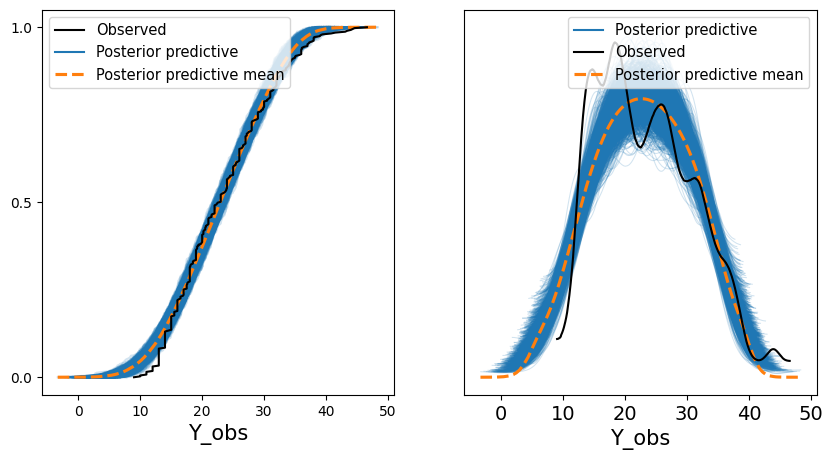

In [85]:
analise_posteriori(trace_pos_ridge)

Na posteriori o alinhamento foi razoável, mas poderia ter sido melhor

In [86]:
with pm.Model(coords=coords) as model_lasso:
  alpha = pm.Laplace('alpha', 0, 1)
  betas = pm.Laplace('betas', 0, 1, dims='features')
  epsilon = pm.HalfNormal('epsilon', 1)

  mu = alpha + tt.dot(X_f, betas)

  likelihood = pm.Normal('Y_obs', mu, epsilon, observed=y_f.values.flatten())
  lasso_trace_prior = pm.sample_prior_predictive()
  trace_lasso = pm.sample()

Output()

Output()

(<Figure size 1000x1000 with 6 Axes>,
 array([[<Axes: xlabel='Betas', ylabel='Contagem'>,
         <Axes: xlabel='Y_obs', ylabel='Contagem'>],
        [<Axes: title={'center': 'Predict a Priori'}, xlabel='Observado', ylabel='Predicted'>,
         <Axes: >],
        [<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>]], dtype=object))

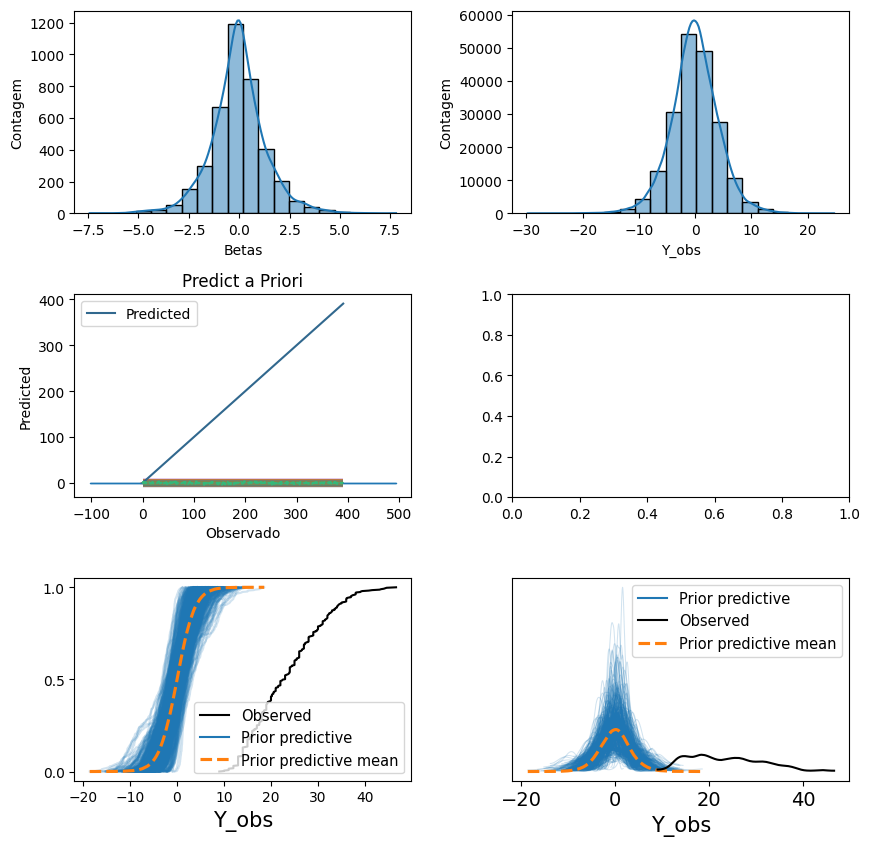

In [87]:
analise_priori(lasso_trace_prior)

Uma priori parecida com a Ridge, tão ruim quanto.

In [88]:
pm.summary(trace_lasso)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,23.425,0.152,23.144,23.713,0.003,0.002,2633.0,1675.0,1.0
betas[displacement],0.527,0.572,-0.571,1.562,0.015,0.012,1548.0,1202.0,1.0
betas[cylinders],-0.058,0.388,-0.807,0.691,0.009,0.010,1935.0,1271.0,1.0
betas[horsepower],-1.183,0.487,-2.082,-0.283,0.015,0.011,1034.0,1213.0,1.0
betas[weight],-4.830,0.479,-5.640,-3.860,0.015,0.010,1063.0,1069.0,1.0
betas[acceleration],0.259,0.234,-0.150,0.718,0.007,0.005,1082.0,1319.0,1.0
betas[model_year],1.311,0.236,0.853,1.746,0.007,0.005,1225.0,1317.0,1.0
betas[origin],0.949,0.201,0.566,1.321,0.005,0.003,1960.0,1573.0,1.0
betas[cluster],1.870,0.216,1.466,2.284,0.006,0.004,1353.0,1479.0,1.0
epsilon,3.017,0.105,2.811,3.209,0.002,0.002,1990.0,1481.0,1.0


Valores de r_hat também bons.

In [89]:
with model_lasso:
  trace_pos_lasso = pm.sample_posterior_predictive(trace_lasso)

Output()

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>], dtype=object))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


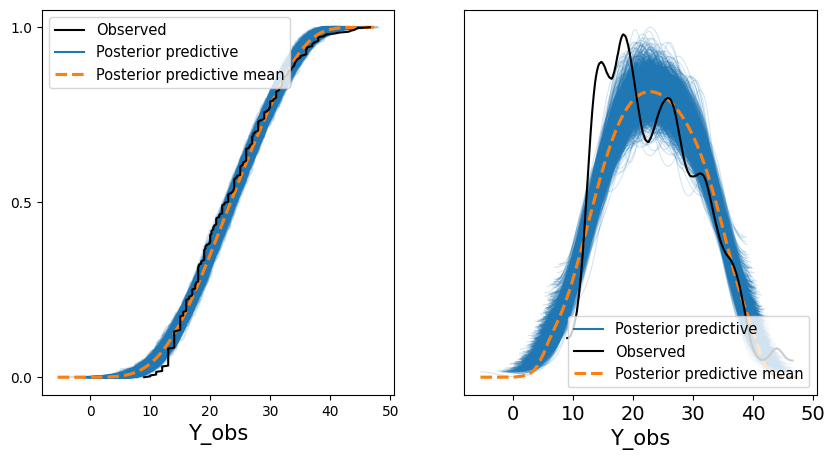

In [90]:
analise_posteriori(trace_pos_lasso)

E uma posteriori também muito parecida com a do modelo Ridge.

In [91]:
clusters = X_f['cluster'].values.astype(int)

with pm.Model(coords=coords) as model_hierarc:
  alpha = pm.Normal('alpha', mu=0, sigma=10, shape=4)
  betas = pm.Normal('betas', dims='features', mu=0, sigma=10)
  sigma = pm.HalfNormal('sigma', sigma=10)

  mu = alpha[clusters] + tt.dot(X_f, betas)

  Y_obs = pm.Normal('Y_obs', mu, sigma, observed=y_f.values.flatten())
  hierarquico_trace_prior = pm.sample_prior_predictive()
  trace_hierarquico = pm.sample()

Output()

Output()

(<Figure size 1000x1000 with 6 Axes>,
 array([[<Axes: xlabel='Betas', ylabel='Contagem'>,
         <Axes: xlabel='Y_obs', ylabel='Contagem'>],
        [<Axes: title={'center': 'Predict a Priori'}, xlabel='Observado', ylabel='Predicted'>,
         <Axes: >],
        [<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>]], dtype=object))

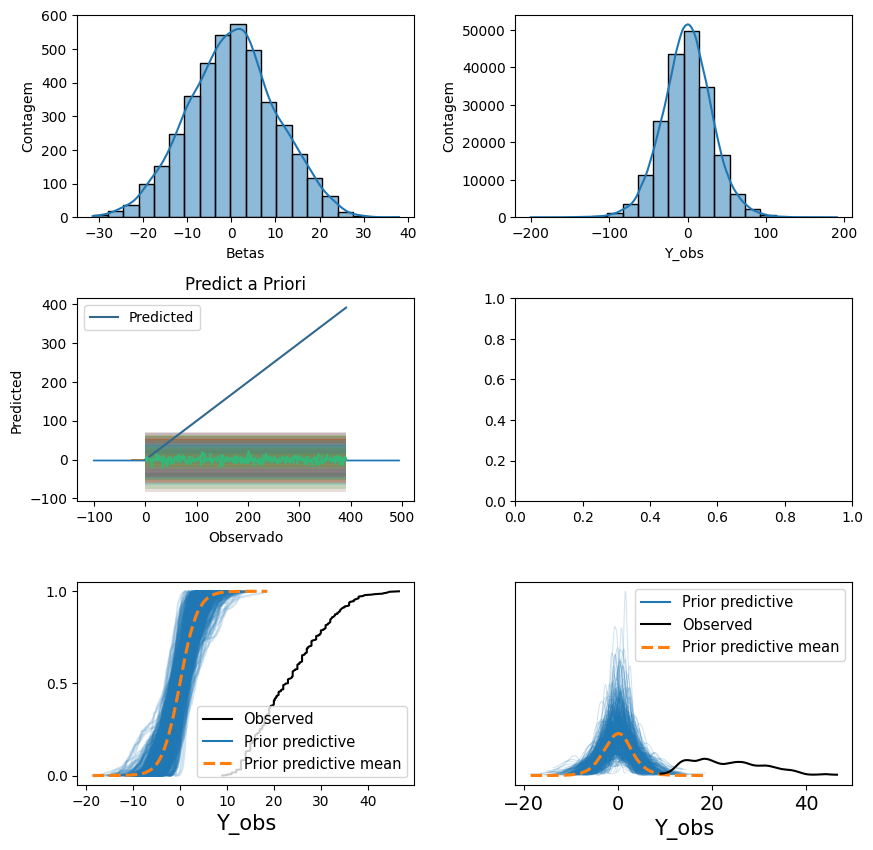

In [92]:
analise_priori(hierarquico_trace_prior)

Uma priori bastante parecida com as últimas vistas.

In [93]:
pm.summary(trace_hierarquico)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],23.474,0.486,22.581,24.396,0.013,0.010,1311.0,1531.0,1.0
alpha[1],19.459,1.497,16.674,22.367,0.054,0.038,774.0,1189.0,1.0
alpha[2],-0.084,9.975,-17.502,19.607,0.211,0.236,2248.0,1333.0,1.0
alpha[3],27.702,1.245,25.370,30.010,0.043,0.031,820.0,1109.0,1.0
betas[displacement],1.086,0.702,-0.219,2.398,0.017,0.014,1682.0,1249.0,1.0
betas[cylinders],-0.016,0.536,-1.007,0.982,0.013,0.011,1828.0,1460.0,1.0
betas[horsepower],-1.469,0.531,-2.481,-0.449,0.013,0.009,1648.0,1231.0,1.0
betas[weight],-4.995,0.497,-6.009,-4.129,0.011,0.008,1880.0,1416.0,1.0
betas[acceleration],0.374,0.248,-0.059,0.869,0.006,0.005,1778.0,1434.0,1.0
betas[model_year],2.095,0.316,1.501,2.674,0.009,0.006,1357.0,1197.0,1.0


Ótimos valores nos r_hat!

In [94]:
with model_hierarc:
  trace_pos_hierarquico = pm.sample_posterior_predictive(trace_hierarquico)

Output()

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>], dtype=object))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


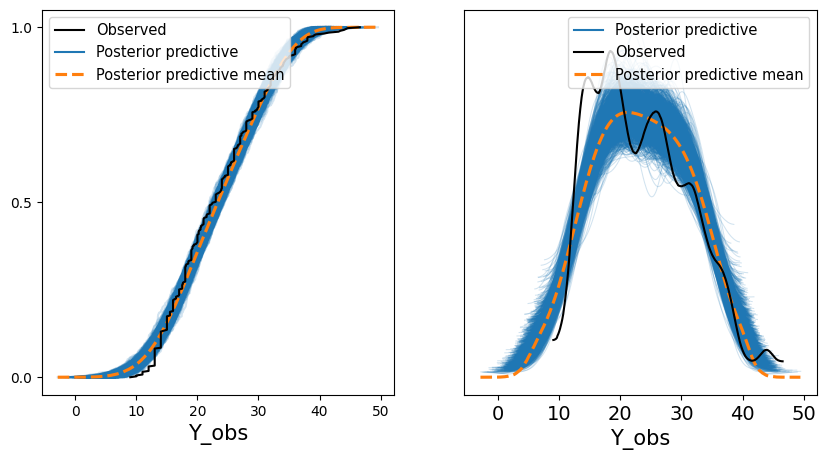

In [95]:
analise_posteriori(trace_pos_hierarquico)

Nada de novo na análise posteriori comparado com as últimas.

In [96]:
with pm.Model(coords=coords) as model_robust:
  alpha = pm.Normal('alpha', 0, 1)
  betas = pm.Normal('betas', 0, 1, dims='features')

  df = pm.Exponential('df', 1)
  mu = alpha + tt.dot(X_f, betas)

  likelihood = pm.StudentT('Y_obs', nu=df, mu=mu, observed=y_f.values.flatten())
  robust_trace_prior = pm.sample_prior_predictive()
  trace_robust = pm.sample()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:250: RuntimeWarning: divide by zero encountered in scalar power
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


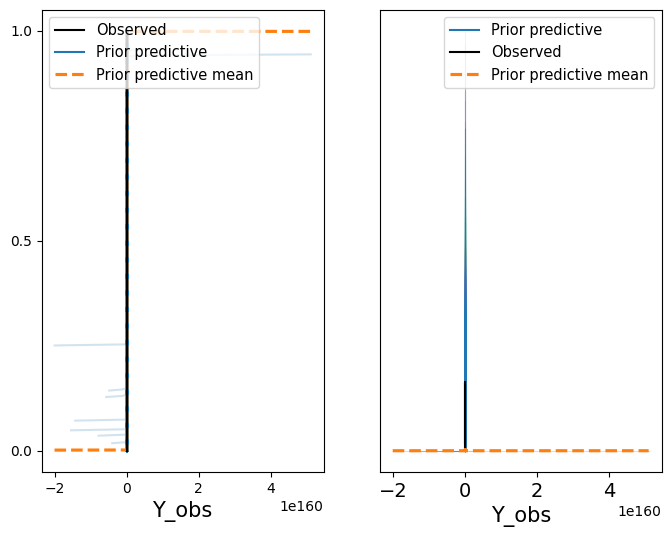

In [97]:
# Erro no histograma :( encontrou valores infs, por alguma razão
# analise_priori(robust_trace_prior)

fig, axes = plt.subplots(1, 2, figsize=(8,6))

az.plot_ppc(robust_trace_prior, group='prior', kind='cumulative',ax=axes[0], observed=True);
az.plot_ppc(robust_trace_prior, group='prior',ax=axes[1], observed=True);

Um alinhamento correto demais.

In [98]:
pm.summary(trace_robust)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,22.926,0.096,22.743,23.104,0.002,0.002,1804.0,1532.0,1.0
betas[displacement],-0.720,0.438,-1.509,0.123,0.014,0.010,1027.0,1279.0,1.0
betas[cylinders],-0.608,0.338,-1.208,0.015,0.009,0.006,1415.0,1233.0,1.0
betas[horsepower],-1.269,0.288,-1.838,-0.733,0.008,0.006,1261.0,1188.0,1.0
betas[weight],-3.009,0.317,-3.579,-2.400,0.010,0.007,1136.0,1057.0,1.0
betas[acceleration],-0.735,0.157,-1.035,-0.453,0.005,0.003,1101.0,1323.0,1.0
betas[model_year],1.381,0.139,1.111,1.623,0.004,0.003,1260.0,1550.0,1.0
betas[origin],1.096,0.149,0.794,1.353,0.003,0.002,1928.0,1502.0,1.0
betas[cluster],1.354,0.142,1.095,1.624,0.004,0.003,1186.0,1283.0,1.0
df,1.133,0.089,0.973,1.298,0.002,0.001,2185.0,1628.0,1.0


Ótimos valores nos r_hat também.

In [99]:
with model_robust:
  trace_pos_robust = pm.sample_posterior_predictive(trace_robust)

Output()

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='Y_obs'>, <Axes: xlabel='Y_obs'>], dtype=object))

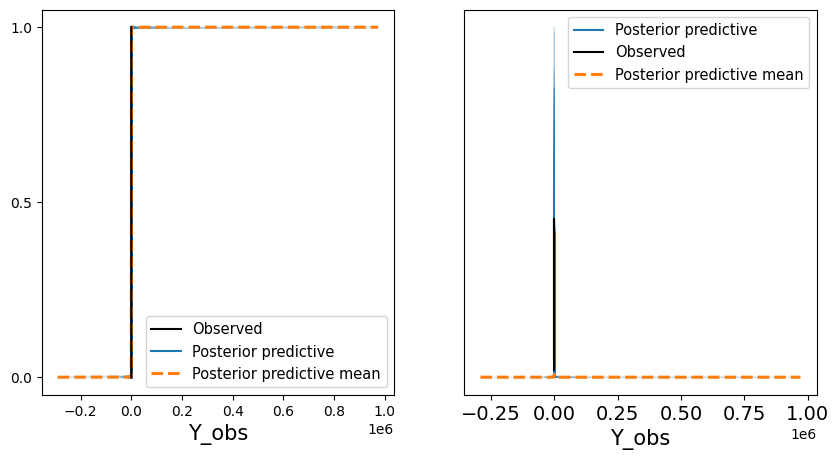

In [100]:
analise_posteriori(trace_pos_robust)

Mais uma vez, um alinhamento correto demais no modelo robusto. O ELPD LOO vai elucidar a questão se ele foi o melhor modelo ou não.

In [101]:
with model_ridge:
  pm.compute_log_likelihood(trace_ridge)
with model_hierarc:
  pm.compute_log_likelihood(trace_hierarquico)
with model_lasso:
  pm.compute_log_likelihood(trace_lasso)
with model_robust:
  pm.compute_log_likelihood(trace_robust)

Output()

Output()

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

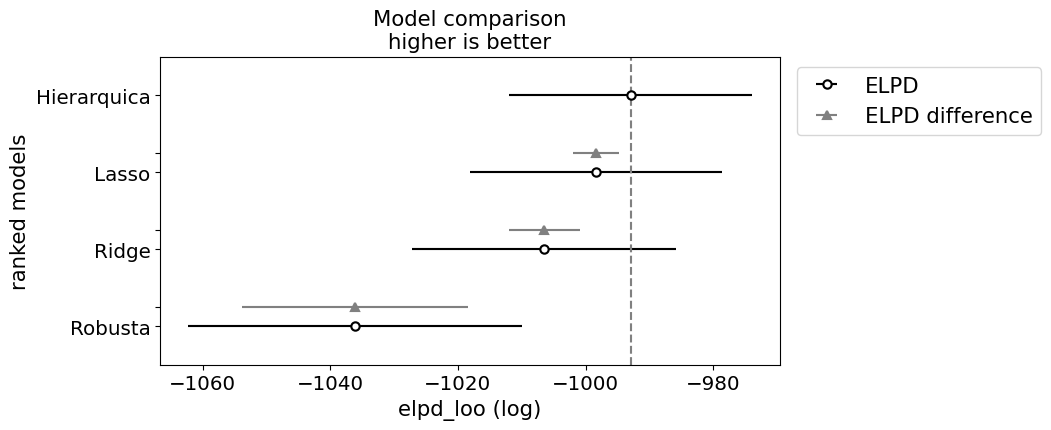

In [102]:
model_compare = az.compare(
    {
        "Ridge": trace_ridge,
        "Lasso": trace_lasso,
        "Hierarquica": trace_hierarquico,
        "Robusta": trace_robust
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(8, 4), insample_dev=False)

O ELPD LOO não mente: o modelo hierarquico foi o melhor. Contudo, esse resultado vem com um asterisco.

As análises priori e (consequentemente) posteriori de todos os modelos não foi muito boa. Isso pode indicar que é necessário realizar uma reparametrização, eliminar as colunas com alta correlação do dataset ou escolher novas colunas para a clusterização. Contudo, o tempo não está ao meu lado hoje, então vou concluir aqui.

PS: A título de curiosidade, rodei em paralelo o modelo sem as colunas weight, horsepower, displacement e cylinders porque as correlações delas eram altas, e esse foi o resultado: 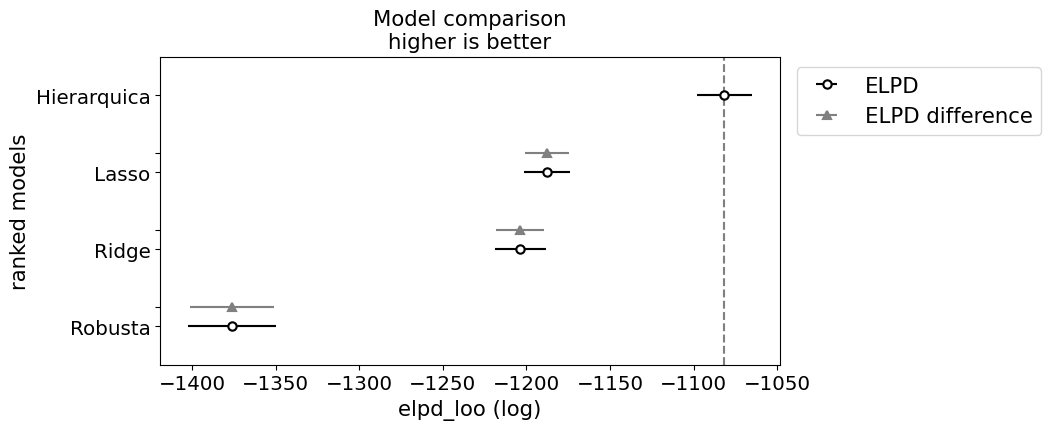